In [16]:
pip install konlpy

In [2]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from konlpy.tag import Twitter
twt = Twitter()
#from hanspell import spell_checker
import re
from konlpy.tag import Okt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

D:\programfiles\anaconda3\envs\pythonopencv\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [3]:
df = pd.read_csv('./result/2020-10-06_14-16-09.csv')
df.head()

,name,ratings,date,helpful,comment,developer_comment
0,이상현,1,2020-10-05,0,개발자분들이 실력이 없으면 그냥 다른곳에 넘겨주고 어플 새로 만들어라 몇개월이 지나...,NaN
1,DA T,3,2020-10-05,0,퍼스트먼데이가 적용되는거 안되는거가 섞여있어 쓰기가 어렵네요..,NaN
2,거누거누,1,2020-10-05,0,지나느롯데닷컴에 비해 5배정도 느려서ㅜ쇼핑하기가 싫어집니다,NaN
3,송철호,2,2020-10-05,0,롯데프레시에서 생일쿠폰이 왔다고 해서 로그인해서 보니 보내준 쿠폰의 마이페이지 항목...,NaN
4,우가연,1,2020-10-05,0,제발.. 장바구니 추가와 삭제시.. 빨리되게 해주세요. 로딩이 넘넘 오래걸려요.. ...,NaN


In [4]:
df = df[['date','comment','ratings','helpful']]
df = df.dropna()
df.isnull().sum()

date       0
comment    0
ratings    0
helpful    0
dtype: int64

In [5]:
df.sort_values('helpful', ascending=False).head(20)

,date,comment,ratings,helpful
2134,2020-04-28,최악입니다. 롯데온으로 바뀌면서 회원등급도 기존vip였는데 최저등급부터 시작하라네요...,1,270
2089,2020-04-28,앱 오픈하기전에 최소한의 테스트는 해 보고 했어야쥐... 기본도 안 됨... 갑자기...,1,267
2641,2018-10-02,앱 반응 속도가 상당히 느리고 오류로 자동 종료되는 경우가 잦음.,2,264
463,2020-06-07,제품상세설명이나 사진이 줌 기능이 안되어 있어 엄청 불편합니다. 이벤트 쿠폰할인도 ...,2,203
3610,2016-07-02,앱에서 주문하면 엘포인트 더 준다더니.. 로그인도 안되고.. 비번을 찾으려해도 계속...,1,151
525,2020-05-29,3조원 부어서 결국 링크 사이트 하나 만든 느낌입니다. 추후 얼마나 안정화가 되고 ...,1,149
2137,2020-04-28,찜한 목록 사용이 너무 불편해요. 찜을 누르면 찜한 목록이 초기 10개 정도만 보이...,2,149
1683,2020-04-29,저도 왠만하면 이런 글 안 올리는데요! 어제는 거의 하루종일 검색도 잘 안되고......,1,144
3519,2016-09-30,왠만하면 이런글 안쓰는데 페이지 넘길때마다 답답함 검색하는것도 한나절 소비자는 검...,1,143
3115,2017-08-03,"몇일째, 비밀번호 바꺼도 틀렸다고 나오고 진짜 열받어서 이거 왜이럽니까? 수시로 보...",1,138


In [6]:
def text_cleaning(text):
    hangul = re.compile('[|ㄱ-ㅎ|ㅏ-ㅣ]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [7]:
def text_cleaning2(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [8]:
df['ko_text'] = df['comment'].apply(lambda x: text_cleaning(x))
df.head()

,date,comment,ratings,helpful,ko_text
0,2020-10-05,개발자분들이 실력이 없으면 그냥 다른곳에 넘겨주고 어플 새로 만들어라 몇개월이 지나...,1,0,개발자분들이 실력이 없으면 그냥 다른곳에 넘겨주고 어플 새로 만들어라 몇개월이 지나...
1,2020-10-05,퍼스트먼데이가 적용되는거 안되는거가 섞여있어 쓰기가 어렵네요..,3,0,퍼스트먼데이가 적용되는거 안되는거가 섞여있어 쓰기가 어렵네요..
2,2020-10-05,지나느롯데닷컴에 비해 5배정도 느려서ㅜ쇼핑하기가 싫어집니다,1,0,지나느롯데닷컴에 비해 5배정도 느려서쇼핑하기가 싫어집니다
3,2020-10-05,롯데프레시에서 생일쿠폰이 왔다고 해서 로그인해서 보니 보내준 쿠폰의 마이페이지 항목...,2,0,롯데프레시에서 생일쿠폰이 왔다고 해서 로그인해서 보니 보내준 쿠폰의 마이페이지 항목...
4,2020-10-05,제발.. 장바구니 추가와 삭제시.. 빨리되게 해주세요. 로딩이 넘넘 오래걸려요.. ...,1,0,제발.. 장바구니 추가와 삭제시.. 빨리되게 해주세요. 로딩이 넘넘 오래걸려요.. ...


In [9]:
df['ko_text'] = df['ko_text'].apply(lambda x: text_cleaning2(x))
df.head()

,date,comment,ratings,helpful,ko_text
0,2020-10-05,개발자분들이 실력이 없으면 그냥 다른곳에 넘겨주고 어플 새로 만들어라 몇개월이 지나...,1,0,개발자분들이 실력이 없으면 그냥 다른곳에 넘겨주고 어플 새로 만들어라 몇개월이 지나...
1,2020-10-05,퍼스트먼데이가 적용되는거 안되는거가 섞여있어 쓰기가 어렵네요..,3,0,퍼스트먼데이가 적용되는거 안되는거가 섞여있어 쓰기가 어렵네요
2,2020-10-05,지나느롯데닷컴에 비해 5배정도 느려서ㅜ쇼핑하기가 싫어집니다,1,0,지나느롯데닷컴에 비해 배정도 느려서쇼핑하기가 싫어집니다
3,2020-10-05,롯데프레시에서 생일쿠폰이 왔다고 해서 로그인해서 보니 보내준 쿠폰의 마이페이지 항목...,2,0,롯데프레시에서 생일쿠폰이 왔다고 해서 로그인해서 보니 보내준 쿠폰의 마이페이지 항목...
4,2020-10-05,제발.. 장바구니 추가와 삭제시.. 빨리되게 해주세요. 로딩이 넘넘 오래걸려요.. ...,1,0,제발 장바구니 추가와 삭제시 빨리되게 해주세요 로딩이 넘넘 오래걸려요 롯데닷컴때만큼...


In [13]:
# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "./korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [14]:
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(7149, 6)


,date,comment,ratings,helpful,ko_text,nouns
0,2020-10-05,개발자분들이 실력이 없으면 그냥 다른곳에 넘겨주고 어플 새로 만들어라 몇개월이 지나...,1,0,개발자분들이 실력이 없으면 그냥 다른곳에 넘겨주고 어플 새로 만들어라 몇개월이 지나...,"[개발자, 실력, 그냥, 어플, 몇개, 접속, 속도, 개선]"
1,2020-10-05,퍼스트먼데이가 적용되는거 안되는거가 섞여있어 쓰기가 어렵네요..,3,0,퍼스트먼데이가 적용되는거 안되는거가 섞여있어 쓰기가 어렵네요,"[퍼스트, 먼데이, 적용, 쓰기]"
2,2020-10-05,지나느롯데닷컴에 비해 5배정도 느려서ㅜ쇼핑하기가 싫어집니다,1,0,지나느롯데닷컴에 비해 배정도 느려서쇼핑하기가 싫어집니다,"[롯데, 배정, 쇼핑]"
3,2020-10-05,롯데프레시에서 생일쿠폰이 왔다고 해서 로그인해서 보니 보내준 쿠폰의 마이페이지 항목...,2,0,롯데프레시에서 생일쿠폰이 왔다고 해서 로그인해서 보니 보내준 쿠폰의 마이페이지 항목...,"[롯데, 프레, 생일, 쿠폰, 로그인, 쿠폰, 마이, 페이지, 항목, 보이지, 롯데..."
4,2020-10-05,제발.. 장바구니 추가와 삭제시.. 빨리되게 해주세요. 로딩이 넘넘 오래걸려요.. ...,1,0,제발 장바구니 추가와 삭제시 빨리되게 해주세요 로딩이 넘넘 오래걸려요 롯데닷컴때만큼...,"[제발, 장바구니, 추가, 삭제, 로딩, 롯데, 롯데, 쇼핑, 진짜]"


In [15]:
df.reset_index(drop= True, inplace= True)

In [16]:
all_words = []
satisfaction= []
for i in range(len(df)):
    words = df['nouns'][i]
    words_arr = []
    for n in words:
        words_arr.append(n)
        satisfaction.append(df['ratings'].iloc[i])
    all_words.extend(words_arr)
    
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df.head()        
    

,words,satisfaction,count
0,개발자,1,1
1,실력,1,1
2,그냥,1,1
3,어플,1,1
4,몇개,1,1


In [17]:
all_words_df = pd.DataFrame({'words':all_words, 'count':len(all_words)*[1]})
all_words_df = all_words_df.groupby('words').sum()
all_words_df.sort_values('count',ascending=False).head()

,count
words,
롯데,2349
상품,1209
쇼핑,1117
검색,875
사용,694


In [18]:
all_words = []
satisfaction= []
for i in range(len(df)):
    words = df['nouns'][i]
    words_arr = []
    for n in words:
        words_arr.append(n)
        satisfaction.append(df['ratings'].iloc[i])
    all_words.extend(words_arr)
    
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df.head()        
    

,words,satisfaction,count
0,개발자,1,1
1,실력,1,1
2,그냥,1,1
3,어플,1,1
4,몇개,1,1


In [19]:
words_satisfaction = all_words_df.groupby('words').mean()['satisfaction']
words_count = all_words_df.groupby('words').sum()['count']
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df.sort_values('count',ascending=False)

,satisfaction,count
words,,
롯데,2.597701,2349
상품,3.161290,1209
쇼핑,3.690242,1117
검색,1.827429,875
사용,3.018732,694
...,...,...
서문,1.000000,1
서민,5.000000,1
서번,5.000000,1


In [20]:
df

,date,comment,ratings,helpful,ko_text,nouns
0,2020-10-05,개발자분들이 실력이 없으면 그냥 다른곳에 넘겨주고 어플 새로 만들어라 몇개월이 지나...,1,0,개발자분들이 실력이 없으면 그냥 다른곳에 넘겨주고 어플 새로 만들어라 몇개월이 지나...,"[개발자, 실력, 그냥, 어플, 몇개, 접속, 속도, 개선]"
1,2020-10-05,퍼스트먼데이가 적용되는거 안되는거가 섞여있어 쓰기가 어렵네요..,3,0,퍼스트먼데이가 적용되는거 안되는거가 섞여있어 쓰기가 어렵네요,"[퍼스트, 먼데이, 적용, 쓰기]"
2,2020-10-05,지나느롯데닷컴에 비해 5배정도 느려서ㅜ쇼핑하기가 싫어집니다,1,0,지나느롯데닷컴에 비해 배정도 느려서쇼핑하기가 싫어집니다,"[롯데, 배정, 쇼핑]"
3,2020-10-05,롯데프레시에서 생일쿠폰이 왔다고 해서 로그인해서 보니 보내준 쿠폰의 마이페이지 항목...,2,0,롯데프레시에서 생일쿠폰이 왔다고 해서 로그인해서 보니 보내준 쿠폰의 마이페이지 항목...,"[롯데, 프레, 생일, 쿠폰, 로그인, 쿠폰, 마이, 페이지, 항목, 보이지, 롯데..."
4,2020-10-05,제발.. 장바구니 추가와 삭제시.. 빨리되게 해주세요. 로딩이 넘넘 오래걸려요.. ...,1,0,제발 장바구니 추가와 삭제시 빨리되게 해주세요 로딩이 넘넘 오래걸려요 롯데닷컴때만큼...,"[제발, 장바구니, 추가, 삭제, 로딩, 롯데, 롯데, 쇼핑, 진짜]"
...,...,...,...,...,...,...
7144,2013-05-29,쇼핑하기 정말 편해졌어요~~^^,5,0,쇼핑하기 정말 편해졌어요,"[쇼핑, 정말]"
7145,2013-05-29,오류도잘안나고행사도자주하고넘맘에들어요~지름신이 더욱더 심해지긴해도 ㅎㅎㅎ 도움 많이되요!,4,0,오류도잘안나고행사도자주하고넘맘에들어요지름신이 더욱더 심해지긴해도 도움 많이되요,"[오류, 행사, 자주, 지름신, 해도, 도움]"
7146,2013-05-29,"여러모바일쇼핑몰앱설치해놓고써봤는데 단연 으뜸이네요 보기쉬운구성과 가장큰혜택, 솔직한...",5,1,여러모바일쇼핑몰앱설치해놓고써봤는데 단연 으뜸이네요 보기쉬운구성과 가장큰혜택 솔직한상...,"[모바일, 쇼핑몰, 설치, 단연, 으뜸, 보기, 성과, 가장, 혜택, 상픔평, 물건..."
7147,2013-05-29,일일이 웹사이트에 들어가 구매할 칠요없이 빠르고 간편하게 내가 원하는 롯데닷컴 상품...,5,0,일일이 웹사이트에 들어가 구매할 칠요없이 빠르고 간편하게 내가 원하는 롯데닷컴 상품...,"[일일이, 웹사이트, 구매, 롯데, 상품]"


In [21]:
stopwords = "./korean_stopwords.txt"
nouns_tagger =Okt()
def text_cleaning(text):
  hangul = re.compile('[^ ㄱ-ㅣ가-힣]')
  result = hangul.sub('', text)
  tagger = Okt()
  nouns = nouns_tagger.nouns(result)
  nouns = [x for x in nouns if len(x) >1]
  nouns =[x for x in nouns if x not in stopwords]
  return nouns

vect = CountVectorizer(tokenizer= lambda x : text_cleaning(x))
bow_vect = vect.fit_transform(df['comment'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [22]:
bow_vect.shape

(7149, 4850)

In [23]:
word_count_dict = dict(zip(word_list, count_list))
print(str(word_count_dict)[:100])

{'가가': 2, '가각': 1, '가게': 6, '가격': 260, '가공': 1, '가관': 1, '가구': 2, '가기': 61, '가까스로': 1, '가까이': 5, '가끔


In [24]:
tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)
print(tf_idf_vect[0])

  (0, 3659)	0.2954759735997292
  (0, 2784)	0.2352466960736217
  (0, 2473)	0.5316432590673439
  (0, 2273)	0.3066844949636399
  (0, 1446)	0.430238018272001
  (0, 488)	0.29346324825260933
  (0, 137)	0.28098404662955345
  (0, 129)	0.3612139833214887


In [25]:
invert_index_vectorizer = {v:k for k,v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100])

{129: '개발자', 2473: '실력', 488: '그냥', 2784: '어플', 1446: '몇개', 3659: '접속', 2273: '속도', 137: '개선', 4413:


<AxesSubplot:>

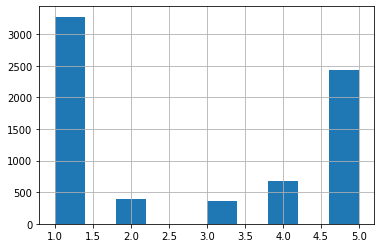

In [26]:
df.ratings.hist()

In [27]:
def rating_to_label(rating) :
  if rating >3:
    return 1
  else:
    return 0
df['y'] = df['ratings'].apply(lambda x : rating_to_label(x))

In [28]:
df.y.value_counts()

0    4026
1    3123
Name: y, dtype: int64

In [29]:
y= df['y']
x_train,x_test, y_train, y_test = train_test_split(tf_idf_vect, y, test_size = 0.3)

In [30]:
print(x_test.shape)

(2145, 4850)


In [31]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [48]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))

accuracy_score 0.8563432835820896
precision_score 0.8178807947019867
recall_score 0.9182156133828996
f1_score 0.8651488616462347


In [49]:
confmat = confusion_matrix(y_test,y_pred)
print('confmat')
print(confmat)

confmat
[[212  55]
 [ 22 247]]


In [34]:
positive_random_idx = df[df['y']==1].sample(892, random_state=33).index.tolist()
negative_random_idx = df[df['y']==0].sample(892,random_state=33).index.tolist()

In [35]:
random_idx = positive_random_idx+negative_random_idx

x=tf_idf_vect[random_idx]
y=df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [36]:
tf_idf_vect

<7149x4850 sparse matrix of type '<class 'numpy.float64'>'
	with 48083 stored elements in Compressed Sparse Row format>

In [37]:
print(x_train.shape)
print(x_test.shape)

(1248, 4850)
(536, 4850)


In [38]:
lr= LogisticRegression(random_state =0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [39]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8563432835820896
0.8178807947019867
0.9182156133828996
0.8651488616462347


In [40]:
confmat=confusion_matrix(y_test, y_pred)
print(confmat)

[[212  55]
 [ 22 247]]


<BarContainer object of 4850 artists>

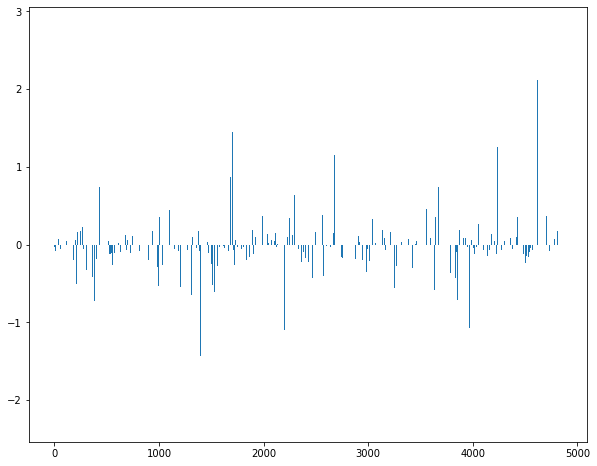

In [41]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [42]:
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:])


[(2.802817680041575, 1462), (2.1142197760238806, 4619), (1.8844105747780957, 3286), (1.6593153317437537, 4098), (1.450762140918298, 1703)]
[(-1.9546208669926552, 818), (-1.9720260549046678, 2810), (-2.087141418974612, 4110), (-2.139344587634473, 3543), (-2.2839041424073967, 2961)]


In [43]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(lr.coef_[0])), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse= False)

In [44]:
for coef in coef_pos_index[:20]:
  print(invert_index_vectorizer[coef[1]], coef[0])

모바일 2.802817680041575
할인 2.1142197760238806
이벤트 1.8844105747780957
최고 1.6593153317437537
백화점 1.450762140918298
가끔 1.419190440744343
구매 1.3685927561389728
컴퓨터 1.306771896899035
쿠폰 1.2491165552639396
보기 1.2312429404970624
구입 1.2022912033563298
혜택 1.1778526196760901
항상 1.175014115961069
기능 1.1524979048788564
애용 1.151270560329853
자주 1.1052184945245178
제품 1.0174067568434502
살수 0.9853026549155226
조금 0.9399805982279169
만족 0.911542918551925


In [45]:
for coef in coef_neg_index[:20]:
  print(invert_index_vectorizer[coef[1]], coef[0])

오류 -2.2839041424073967
장바구니 -2.139344587634473
최악 -2.087141418974612
업데이트 -1.9720260549046678
다시 -1.9546208669926552
계속 -1.9463515200502477
실행 -1.8523240540638393
로그인 -1.8461541552809657
등급 -1.7482383666415684
에러 -1.676847365110042
삭제 -1.6741916039796556
검색 -1.6732421806673572
자꾸 -1.5254529384262354
먹통 -1.433567382337208
화면 -1.425718442221131
그냥 -1.418997557165261
예전 -1.3672388058560865
설치 -1.3637745612838823
로딩 -1.2775389777296402
하나 -1.2428231094337467
